In [1]:
from   mcmc.samplers    import MetropolisHastingsSampler, GibbsSampler, AdaptiveGibbsSampler
from   mcmc.pstar       import log_pstar_regression
from   sklearn.datasets import load_digits
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X, y = data, target# load_digits(return_X_y = True)

In [2]:
N         = 10000
theta0    = np.zeros((X.shape[1] + 1))
deviation = np.ones_like(theta0) * 0.5
data      = (X, y)

np.random.seed(0)

In [3]:
mh = MetropolisHastingsSampler(log_pstar_regression, deviation, data)

mh.fit(N, theta0)

# compare the average of the samples to the true values
# print(mcmc.get_samples(500).mean(axis = 0), np.append(b, w))

# # norm distance
# np.linalg.norm(mcmc.get_samples(500).mean(axis = 0) - np.append(b, w))

iteration | log pstar
----------+----------
        0 | -3.74e+06
    1,000 | -2.02e+06    elapsed 0h 00m 01s    eta 0h 00m 10s
    2,000 | -2.02e+06    elapsed 0h 00m 02s    eta 0h 00m 08s
    3,000 | -2.02e+06    elapsed 0h 00m 03s    eta 0h 00m 07s
    4,000 | -2.02e+06    elapsed 0h 00m 04s    eta 0h 00m 06s
    5,000 | -2.02e+06    elapsed 0h 00m 05s    eta 0h 00m 05s
    6,000 | -2.02e+06    elapsed 0h 00m 06s    eta 0h 00m 04s
    7,000 | -8.02e+05    elapsed 0h 00m 07s    eta 0h 00m 03s
    8,000 | -8.02e+05    elapsed 0h 00m 08s    eta 0h 00m 02s
    9,000 | -8.02e+05    elapsed 0h 00m 09s    eta 0h 00m 01s
   10,000 | -8.02e+05    elapsed 0h 00m 09s    eta 0h 00m 00s


In [4]:
gibbs = GibbsSampler(log_pstar_regression, deviation, data)

gibbs.fit(N, theta0)

# compare the average of the samples to the true values
# print(mcmc.get_samples(500).mean(axis = 0), np.append(b, w))

# # norm distance
# np.linalg.norm(mcmc.get_samples(500).mean(axis = 0) - np.append(b, w))

iteration | log pstar
----------+----------
        0 | -3.74e+06
      264 | -2.14e+05    elapsed 0h 00m 04s    eta 0h 02m 36s

KeyboardInterrupt: 

In [ ]:
adaptive = AdaptiveGibbsSampler(log_pstar_regression, deviation, data)

adaptive.fit(N, theta0)

# compare the average of the samples to the true values
# print(mcmc.get_samples(500).mean(axis = 0), np.append(b, w))

# # norm distance
# np.linalg.norm(mcmc.get_samples(500).mean(axis = 0) - np.append(b, w))

iteration | log pstar
----------+----------
        0 | -3.74e+06
      500 | -1.86e+05    elapsed 0h 00m 27s    eta 0h 04m 02s
    1,000 | -1.72e+05    elapsed 0h 00m 53s    eta 0h 03m 33s
    1,500 | -1.68e+05    elapsed 0h 01m 20s    eta 0h 03m 06s
    2,000 | -1.65e+05    elapsed 0h 01m 44s    eta 0h 02m 37s
    2,500 | -1.63e+05    elapsed 0h 02m 10s    eta 0h 02m 10s
    3,000 | -1.61e+05    elapsed 0h 02m 35s    eta 0h 01m 43s
    3,500 | -1.60e+05    elapsed 0h 03m 01s    eta 0h 01m 18s
    4,000 | -1.58e+05    elapsed 0h 03m 28s    eta 0h 00m 52s
    4,500 | -1.57e+05    elapsed 0h 03m 52s    eta 0h 00m 26s
    5,000 | -1.56e+05    elapsed 0h 04m 18s    eta 0h 00m 00s


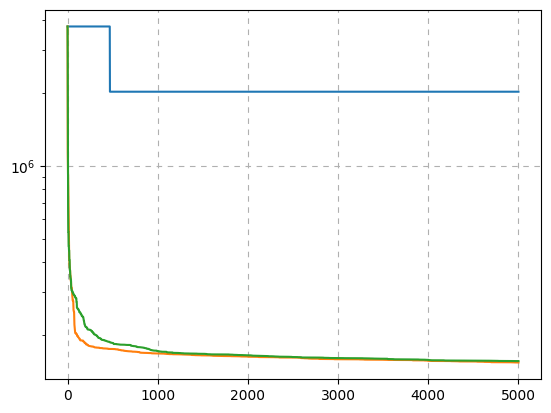

In [ ]:
from matplotlib import pyplot as plt

plt.semilogy(-mh.log_pstars)
plt.semilogy(-gibbs.log_pstars)
plt.semilogy(-adaptive.log_pstars)

plt.grid(ls = (0, (5, 5)))

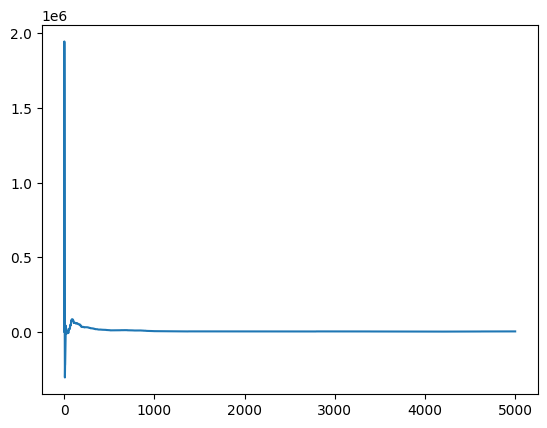

In [ ]:
plt.plot(gibbs.log_pstars - adaptive.log_pstars)